# Curve fit residuals

In [22]:
from os.path import exists# 
file_exists = exists('basic_material.py')

if (not file_exists):
  !wget -O basic_material.py https://www.dropbox.com/s/o48uhuwah8n2xww/basic_material.py?dl=0
%run basic_material

try:
  %reload_ext autoreload
except:
  %load_ext autoreload
%autoreload 2

Running Python: 3.8.16


In [43]:
# make polynomial
n = 6
p = np.poly1d(np.random.randn(n+1))
p

poly1d([ 1.1911, -0.2642, -0.7497, -0.1654, -0.0339, -2.5440, -0.2457])

In [44]:
# add some noise to measurments of p
x = np.linspace(-5,5,20)
N = len(x)
y = p(x) + np.random.randn(N)

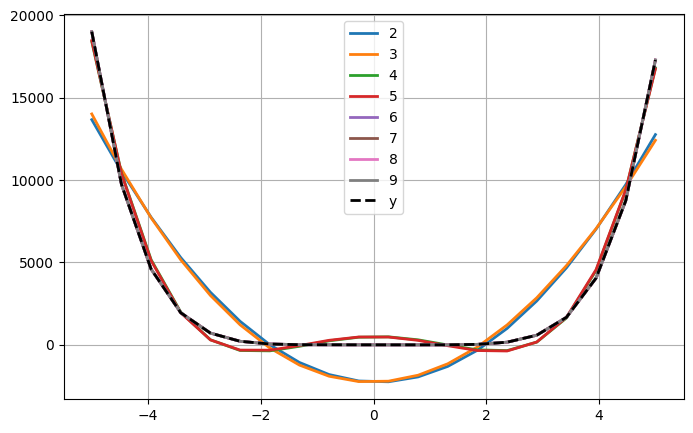

In [45]:
plt.figure(0,figsize=(8,5))

Z = np.empty((1,N))
for ii in range(2,10):
    pp = np.poly1d(np.polyfit(x, y, ii))
    plt.plot(x,pp(x),label=str(ii))
    res = (y - pp(x))
    Z = np.vstack((Z,res))
plt.plot(x,y,'k--',lw=2,label='y')
plt.legend()
plt.show()

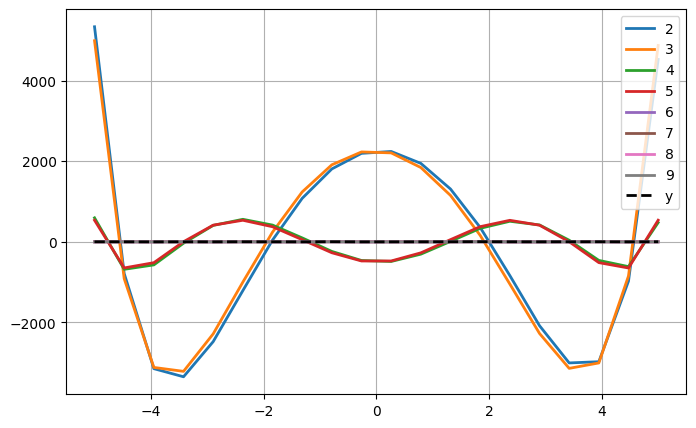

In [46]:
plt.figure(0,figsize=(8,5))
for ii in range(2,10):
    pp = np.poly1d(np.polyfit(x, y, ii))
    plt.plot(x,y-pp(x),label=str(ii))
plt.plot(x,y-p(x),'k--',lw=2,label='y')
plt.legend()
plt.show()

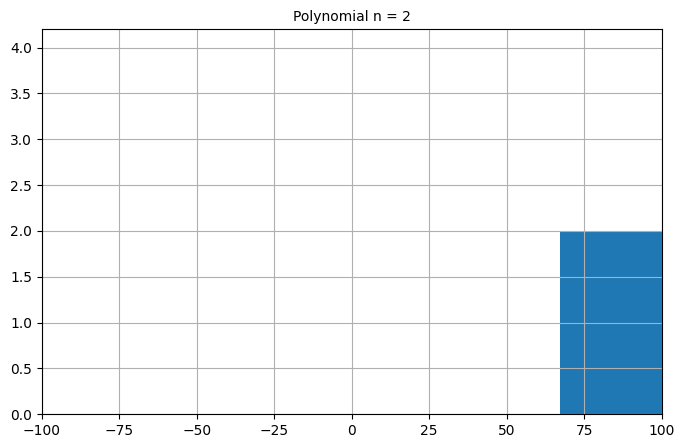

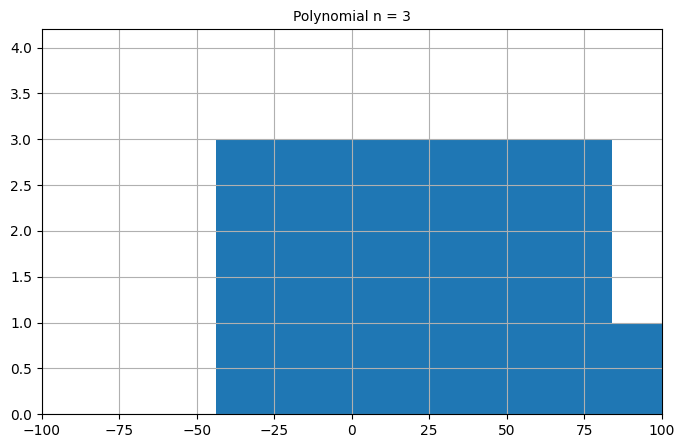

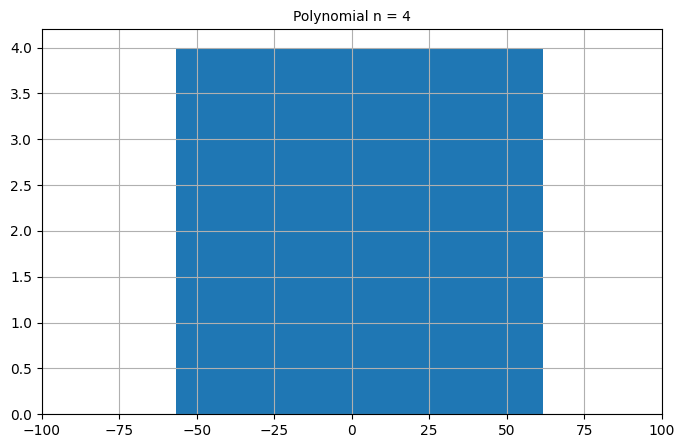

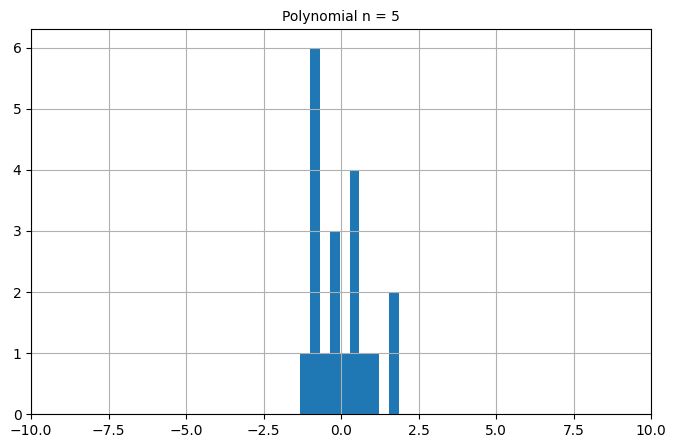

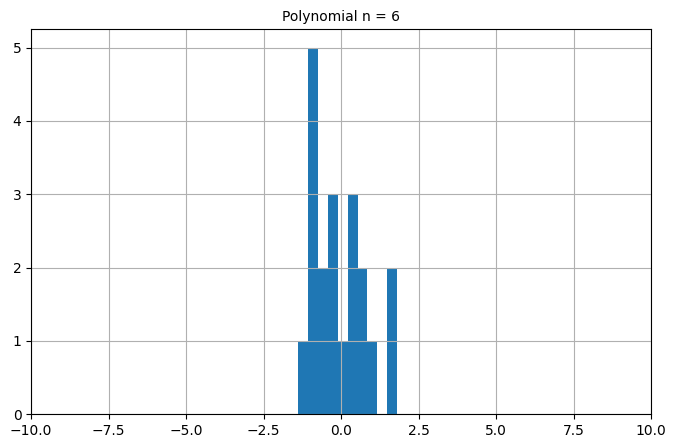

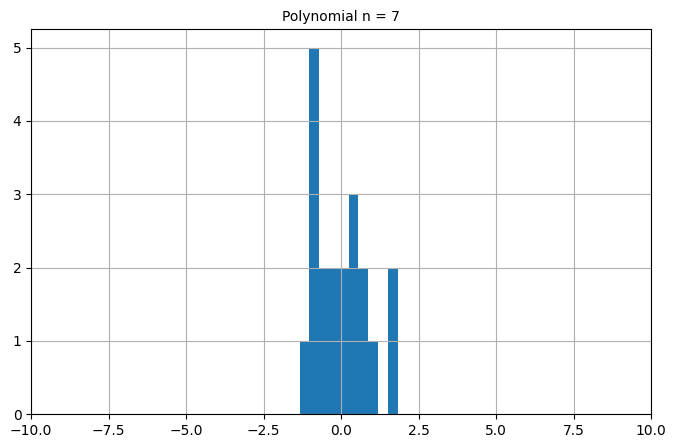

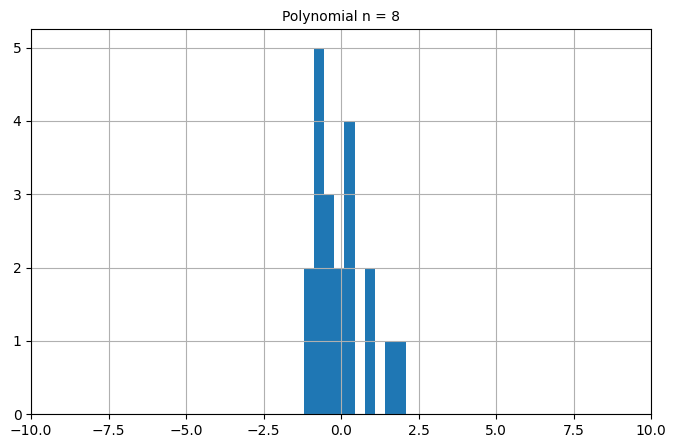

In [47]:
# look at residuals
for ii in range(2,9):
    plt.figure(ii,figsize=(8,5))
    plt.hist(Z[ii,:])
    if (ii < n-1):
        plt.xlim([-100,100])
    else:
        plt.xlim([-10,10])
    plt.title('Polynomial n = '+str(ii))
    plt.show()